# Feature Scaling

## Standardization (Z-score normalization)

from http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling

In [1]:
from sklearn import preprocessing
import numpy as np
X = np.array([[ 1., -1.,  2.],
                     [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])
X_scaled = preprocessing.scale(X)

print('X_scaled: ')
print(X_scaled)

print('\nX_scaled.mean:') 
print(X_scaled.mean(axis=0))

print('\nX_scaled.std:') 
print(X_scaled.std(axis=0))


X_scaled: 
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]

X_scaled.mean:
[ 0.  0.  0.]

X_scaled.std:
[ 1.  1.  1.]


# Skew Distribution

## Transform data with skew distribution to normal distribution

from https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.skew.html

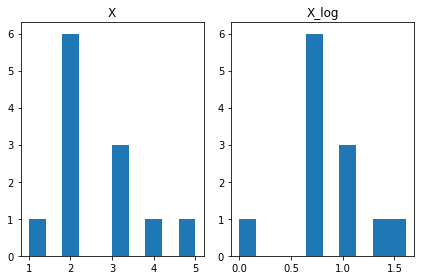

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

X = np.array([[1,2 ,2, 2, 2, 2, 2, 3, 3, 3, 4, 5]])
X = np.transpose(X)
X_log = np.log(X)


# plot histogram
plt.figure(1)

plt.subplot(121)
plt.hist(X)
plt.title('X')

plt.subplot(122)
plt.hist(X_log)
plt.title('X_log')

plt.tight_layout()

plt.show()

# Dealing with Missing Value

## Drop rows or columns with missing values

from https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame([[np.nan, 2, np.nan, 0], [3, 4, np.nan, 1], [np.nan, np.nan, np.nan, 5]], columns=list('ABCD'))
df.head()

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


In [4]:
df.dropna(axis=1, how='any')

,D
0,0
1,1
2,5


In [5]:
df.dropna(axis=1, how='all')

,A,B,D
0,NaN,2.0,0
1,3.0,4.0,1
2,NaN,NaN,5


In [6]:
df.drop(['A'],axis=1)

,B,C,D
0,2.0,NaN,0
1,4.0,NaN,1
2,NaN,NaN,5


In [7]:
df.drop(0,axis=0)

,A,B,C,D
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5


In [8]:
df.B = df.B.fillna(df.mean()["B"])

df.head()

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,3.0,NaN,5


# Lab Instruction

# Part 1: Import the dataset

Import "Preprocessing and Linear Regression Dataset.csv"

In [9]:
import pandas as pd
df = pd.read_csv("Preprocessing & Linear Regression Lab.csv")

In [10]:
df.head()

,Unnamed: 0,Foundation,1stFlrSF,KitchenQual,Fireplaces,HeatingQC,FullBath,BsmtQual,OpenPorchSF,GarageYrBlt,...,BsmtFinType1,YearBuilt,GarageArea,TotRmsAbvGrd,GarageCars,GrLivArea,YearRemodAdd,LotFrontage,Fence,SalePrice
0,0,PConc,856,Gd,0,Ex,2,Gd,61,2003.0,...,GLQ,2003,548,8,2,1710,2003,65.0,NaN,208500
1,1,CBlock,1262,TA,1,Ex,2,Gd,0,1976.0,...,ALQ,1976,460,6,2,1262,1976,80.0,NaN,181500
2,2,PConc,920,Gd,1,Ex,2,Gd,42,2001.0,...,GLQ,2001,608,6,2,1786,2002,68.0,NaN,223500
3,3,BrkTil,961,Gd,1,Gd,1,TA,35,1998.0,...,ALQ,1915,642,7,3,1717,1970,60.0,NaN,140000
4,4,PConc,1145,Gd,1,Ex,2,Gd,84,2000.0,...,GLQ,2000,836,9,3,2198,2000,84.0,NaN,250000


# Part 2: Preprocessing

Look at the dataset and try to preprocess it. There are many problems with this dataset. Apply your knowledge to this dataset, and try to answer the following questions

1. Which features need preprocessing? Does the feature have NaN value? What is the distribution of the data if we plot them? Is that normal?
2. How do we preprocess such features?